In [11]:
import librosa 
import matplotlib.pyplot as plt
import numpy as np
import torch

#### 음성 멜스펙토그램 플롯

Wav length: 12.32, Mel_S shape:(40, 1233)


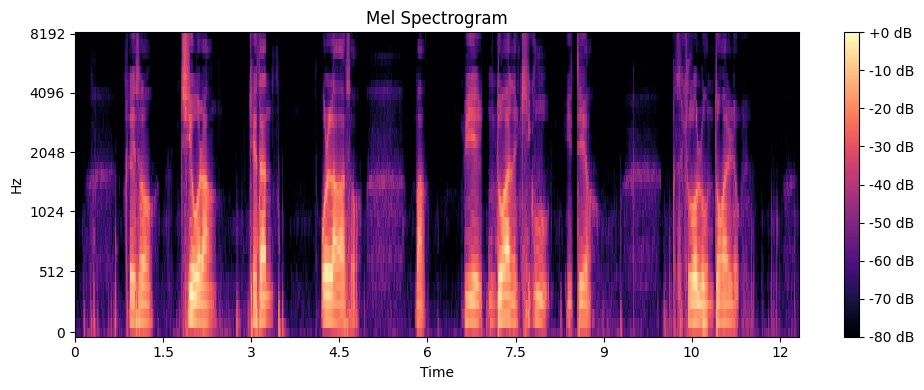

In [10]:
frame_length = 0.025

frame_stride = 0.010

def Mel_S(wav_file):

        # mel-spectrogram

        y, sr = librosa.load(wav_file, sr = 16000)

        # wav_length = len(y) / sr

        input_nfft = int(round(sr * frame_length))

        input_stride = int(round(sr * frame_stride))

        S = librosa.feature.melspectrogram(y = y, n_mels = 40, n_fft = input_nfft, hop_length = input_stride)

        print("Wav length: {}, Mel_S shape:{}".format(len(y) / sr, np.shape(S)))

        plt.figure(figsize=(10, 4))

        librosa.display.specshow(librosa.power_to_db(S, ref = np.max),

        y_axis = 'mel', sr = sr, hop_length = input_stride, x_axis = 'time')

        plt.colorbar(format = '%+2.0f dB')

        plt.title('Mel Spectrogram')

        plt.tight_layout()

        plt.savefig('Mel-Spectrogram example.png')

        plt.show()

        return S

test_data = '../data2/KsponSpeech/sample.wav'

mel_spec = Mel_S(test_data)

#### MFCC

In [19]:
def get_librosa_mfcc(filepath, n_mfcc = 40):
    SAMPLE_RATE = 16000
    hop_length = 128
    n_fft = 512

    sig, sr = librosa.core.load(filepath)
    mfccs = librosa.feature.mfcc(y = sig, sr = sr, hop_length = hop_length, n_mfcc= n_mfcc, n_fft = n_fft)
    mfccs = torch.FloatTensor(mfccs).transpose(0,1)
    return mfccs

In [22]:
get_librosa_mfcc('../data2/KsponSpeech/sample.wav')

tensor([[-7.2664e+02,  7.1454e+00,  6.9758e+00,  ..., -6.9508e-01,
         -7.1171e-01, -7.0339e-01],
        [-7.1966e+02,  1.6376e+01,  1.4545e+01,  ...,  9.2748e-01,
          1.0584e-01, -9.6514e-01],
        [-7.2015e+02,  1.5575e+01,  1.3473e+01,  ..., -6.8178e-01,
         -1.8488e+00, -3.1168e+00],
        ...,
        [-6.8791e+02,  5.1342e+01,  2.6599e+01,  ...,  2.0377e+00,
         -1.6109e-01, -1.3649e+00],
        [-6.8475e+02,  5.6877e+01,  3.4703e+01,  ...,  2.6091e+00,
         -1.2581e+00, -6.8654e+00],
        [-6.8899e+02,  5.3143e+01,  3.5655e+01,  ...,  3.2363e+00,
          7.4584e-01, -2.7627e+00]])

### BERT+BiLSTM 감정분석

In [23]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC, BertTokenizer, BertModel
from datasets import load_dataset
import soundfile as sf
import torch
import torch.nn as nn
import torch.optim as optim

In [58]:
from datasets import Dataset
import os

In [59]:
## 음성 인식 모델 및 프로세서 로드
processor = Wav2Vec2Processor.from_pretrained("kresnik/wav2vec2-large-xlsr-korean")
asr_model = Wav2Vec2ForCTC.from_pretrained("kresnik/wav2vec2-large-xlsr-korean").to('cuda')

## BERT 모델 및 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained('bert-base-multilingual-cased').to('cuda')

# BiLSTM 모델 정의
class BERT_BiLSTM(nn.Module):
    def __init__(self, bert_model, hidden_dim, output_dim):
        super(BERT_BiLSTM, self).__init__()
        self.bert = bert_model
        self.lstm = nn.LSTM(bert_model.config.hidden_size, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim) # 2 for bidirectional

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        lstm_output, _ = self.lstm(bert_outputs.last_hidden_state)
        pooled_output = torch.mean(lstm_output, 1)
        return self.fc(pooled_output)

# 모델 인스턴스 생성
hidden_dim = 256
output_dim = 3 # 예: 감정이 3가지 카테고리인 경우
model = BERT_BiLSTM(bert_model, hidden_dim, output_dim).to('cuda')


# 데이터셋 경로 설정
audio_files_path = '../data2/test'
audio_files = [os.path.join(audio_files_path,f ) for f in os.listdir(audio_files_path) if f.endswith('.wav')]

# 데이터셋 생성
data = {'file' : audio_files}
test_ds = Dataset.from_di
\dwdfasasasdfdfssafsdaasdffasdㅇㄹㅇasdfadfsafdfasdfasfdafsdfasdasdfsdfafasdfdsasdf

Some weights of the model checkpoint at kresnik/wav2vec2-large-xlsr-korean were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at kresnik/wav2vec2-large-xlsr-korean and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRA

In [60]:
test_ds

Dataset({
    features: ['file'],
    num_rows: 2
})

In [33]:
ds['train']

Dataset({
    features: ['audio'],
    num_rows: 6
})

In [54]:
test_ds

Dataset({
    features: ['audio'],
    num_rows: 1
})

In [64]:

# 음성 데이터를 텍스트로 변환하는 함수
def speech_to_text(batch):
    speech, _ = sf.read(batch["file"])
    inputs = processor(speech, sampling_rate=16000, return_tensors="pt", padding="longest")
    input_values = inputs.input_values.to("cuda")
    with torch.no_grad():
        logits = asr_model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    batch["text"] = transcription[0]
    return batch

test_ds = test_ds.map(speech_to_text)

# 텍스트 데이터를 BERT 입력으로 변환하는 함수
def prepare_input(batch):
    encoding = tokenizer(batch["text"], return_tensors='pt', padding=True, truncation=True, max_length=128)
    batch["input_ids"] = encoding["input_ids"].to('cuda')
    batch["attention_mask"] = encoding["attention_mask"].to('cuda')
    return batch

test_ds = test_ds.map(prepare_input)

# 감정 분류를 위한 예측 함수
def predict(batch):
    model.eval()
    with torch.no_grad():
        outputs = model(batch["input_ids"], batch["attention_mask"])
        print(f"Model outputs: {outputs}")  # Debugging line
        print(f"Output type: {type(outputs)}, Output shape: {outputs.shape}")  # Debugging line
        batch["predicted_label"] = torch.argmax(outputs, dim=1).cpu().numpy()
    return batch

test_ds = test_ds.map(predict)

# 결과 확인
print(test_ds["predicted_label"])

Map:   0%|          | 0/2 [00:00<?, ? examples/s]


AttributeError: 'list' object has no attribute 'size'

In [1]:
import torch
import soundfile as sf
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC, BertTokenizer, BertModel
import torch.nn as nn
from datasets import Dataset, load_dataset
import os


c:\Users\Jws\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# 음성 인식 모델 및 프로세서 로드
processor = Wav2Vec2Processor.from_pretrained("kresnik/wav2vec2-large-xlsr-korean")
asr_model = Wav2Vec2ForCTC.from_pretrained("kresnik/wav2vec2-large-xlsr-korean").to('cuda')

# BERT 모델 및 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained('bert-base-multilingual-cased').to('cuda')

# BiLSTM 모델 정의
class BERT_BiLSTM(nn.Module):
    def __init__(self, bert_model, hidden_dim, output_dim):
        super(BERT_BiLSTM, self).__init__()
        self.bert = bert_model
        self.lstm = nn.LSTM(bert_model.config.hidden_size, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # 2 for bidirectional

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        lstm_output, _ = self.lstm(bert_outputs.last_hidden_state)
        pooled_output = torch.mean(lstm_output, 1)
        return self.fc(pooled_output)

# 모델 인스턴스 생성
hidden_dim = 256
output_dim = 3  # 예: 감정이 3가지 카테고리인 경우
model = BERT_BiLSTM(bert_model, hidden_dim, output_dim).to('cuda')

# 데이터셋 경로 설정
audio_files_path = "../data2/test"
audio_files = [os.path.join(audio_files_path, f) for f in os.listdir(audio_files_path) if f.endswith('.wav')]

# 데이터셋 생성
data = {"file": audio_files}
test_ds = Dataset.from_dict(data)

# 음성 데이터를 텍스트로 변환하는 함수
def speech_to_text(batch):
    speech, _ = sf.read(batch["file"])
    inputs = processor(speech, sampling_rate=16000, return_tensors="pt", padding="longest")
    input_values = inputs.input_values.to("cuda")
    with torch.no_grad():
        logits = asr_model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    batch["text"] = transcription[0]
    return batch

test_ds = test_ds.map(speech_to_text)

# 텍스트 데이터를 BERT 입력으로 변환하는 함수
def prepare_input(batch):
    encoding = tokenizer(batch["text"], return_tensors='pt', padding=True, truncation=True, max_length=128)
    batch["input_ids"] = encoding["input_ids"].squeeze().to('cuda')
    batch["attention_mask"] = encoding["attention_mask"].squeeze().to('cuda')
    return batch

test_ds = test_ds.map(prepare_input)


Some weights of the model checkpoint at kresnik/wav2vec2-large-xlsr-korean were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at kresnik/wav2vec2-large-xlsr-korean and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRA

In [3]:
test_ds

Dataset({
    features: ['file', 'text', 'input_ids', 'attention_mask'],
    num_rows: 2
})

In [14]:
# 감정 분류를 위한 예측 함수
def predict(batch):
    model.eval()
    with torch.no_grad():
        print(f"Input IDs type: {type(batch['input_ids'])}, Attention Mask type: {type(batch['attention_mask'])}")  # 디버깅용 출력
        print(f"Input IDs shape before model: {batch['input_ids'].shape}, Attention Mask shape before model: {batch['attention_mask'].shape}")  # 디버깅용 출력
        if isinstance(batch["input_ids"], list):
            batch["input_ids"] = torch.tensor(batch["input_ids"]).to('cuda')
        if isinstance(batch["attention_mask"], list):
            batch["attention_mask"] = torch.tensor(batch["attention_mask"]).to('cuda')
        outputs = model(batch["input_ids"].unsqueeze(0), batch["attention_mask"].unsqueeze(0))  # 배치 차원 추가
        print(f"Model outputs: {outputs}")  # 디버깅용 출력
        print(f"Output type: {type(outputs)}, Output shape: {outputs.shape}")  # 디버깅용 출력
        batch["predicted_label"] = torch.argmax(outputs, dim=1).cpu().numpy()
    return batch

test_ds = test_ds.map(predict)

# 결과 확인
print(test_ds["predicted_label"])

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Input IDs type: <class 'list'>, Attention Mask type: <class 'list'>


AttributeError: 'list' object has no attribute 'shape'

In [11]:

# 감정 분류를 위한 예측 함수
def predict(batch):
    model.eval()
    with torch.no_grad():
        print(f"Input IDs shape before model: {batch['input_ids'].shape}, Attention Mask shape before model: {batch['attention_mask'].shape}")  # 디버깅용 출력
        outputs = model(batch["input_ids"].unsqueeze(0), batch["attention_mask"].unsqueeze(0))  # 배치 차원 추가
        print(f"Model outputs: {outputs}")  # 디버깅용 출력
        print(f"Output type: {type(outputs)}, Output shape: {outputs.shape}")  # 디버깅용 출력
        batch["predicted_label"] = torch.argmax(outputs, dim=1).cpu().numpy()
    return batch

test_ds = test_ds.map(predict)

# 결과 확인
print(test_ds["predicted_label"])


Map:   0%|          | 0/2 [00:00<?, ? examples/s]


AttributeError: 'list' object has no attribute 'shape'

In [12]:
model(test_ds["input_ids"].unsqueeze(0), test_ds["attention_mask"].unsqueeze(0))

AttributeError: 'list' object has no attribute 'unsqueeze'

In [ ]:
["attention_mask"].unsqueeze(0))

In [13]:
model(test_ds["input_ids"], test_ds["attention_mask"])

AttributeError: 'list' object has no attribute 'size'

In [4]:
test_ds['input_ids']

[[101, 9595, 23160, 9405, 9405, 13764, 11903, 102], [101, 9881, 9056, 102]]

In [5]:
test_ds["attention_mask"]

[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1]]

In [15]:
from datasets import Dataset, DatasetDict

In [16]:
# 음성 인식 모델 및 프로세서 로드
processor = Wav2Vec2Processor.from_pretrained("kresnik/wav2vec2-large-xlsr-korean")
asr_model = Wav2Vec2ForCTC.from_pretrained("kresnik/wav2vec2-large-xlsr-korean").to('cuda')

# BERT 모델 및 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained('bert-base-multilingual-cased').to('cuda')

# BiLSTM 모델 정의
class BERT_BiLSTM(nn.Module):
    def __init__(self, bert_model, hidden_dim, output_dim):
        super(BERT_BiLSTM, self).__init__()
        self.bert = bert_model
        self.lstm = nn.LSTM(bert_model.config.hidden_size, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # 2 for bidirectional

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        lstm_output, _ = self.lstm(bert_outputs.last_hidden_state)
        pooled_output = torch.mean(lstm_output, 1)
        return self.fc(pooled_output)

# 모델 인스턴스 생성
hidden_dim = 256
output_dim = 3  # 예: 감정이 3가지 카테고리인 경우
model = BERT_BiLSTM(bert_model, hidden_dim, output_dim).to('cuda')

# 데이터셋 경로 설정
audio_files_path = "../data2/test"
audio_files = [os.path.join(audio_files_path, f) for f in os.listdir(audio_files_path) if f.endswith('.wav')]

# 데이터셋 생성
data = {"file": audio_files}
dataset = Dataset.from_dict(data)
test_ds = DatasetDict({"test": dataset})

# 음성 데이터를 텍스트로 변환하는 함수
def speech_to_text(batch):
    speech, _ = sf.read(batch["file"])
    inputs = processor(speech, sampling_rate=16000, return_tensors="pt", padding="longest")
    input_values = inputs.input_values.to("cuda")
    with torch.no_grad():
        logits = asr_model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    batch["text"] = transcription[0]
    return batch

test_ds = test_ds.map(speech_to_text, remove_columns=["file"])

# 텍스트 데이터를 BERT 입력으로 변환하는 함수
def prepare_input(batch):
    encoding = tokenizer(batch["text"], return_tensors='pt', padding=True, truncation=True, max_length=128)
    batch["input_ids"] = encoding["input_ids"].squeeze(0).to('cuda')
    batch["attention_mask"] = encoding["attention_mask"].squeeze(0).to('cuda')
    return batch

test_ds = test_ds.map(prepare_input, remove_columns=["text"])


Some weights of the model checkpoint at kresnik/wav2vec2-large-xlsr-korean were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at kresnik/wav2vec2-large-xlsr-korean and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRA

In [19]:

# 감정 분류를 위한 예측 함수
def predict(batch):
    model.eval()
    with torch.no_grad():
        outputs = model(batch["input_ids"], batch["attention_mask"])  # 배치 차원 추가
        batch["predicted_label"] = torch.argmax(outputs, dim=1).cpu().numpy()
    return batch

test_ds = test_ds.map(predict)

# 결과 확인
print(test_ds["test"]["predicted_label"])


Map:   0%|          | 0/2 [00:00<?, ? examples/s]


AttributeError: 'list' object has no attribute 'size'

In [29]:
# 감정 분류를 위한 예측 함수
def predict(batch):
    model.eval()
    with torch.no_grad():
        print(f"Input IDs type: {type(batch['input_ids'])}, Attention Mask type: {type(batch['attention_mask'])}")  # 디버깅용 출력
        
        if isinstance(batch["input_ids"], list):
            batch["input_ids"] = torch.tensor(batch["input_ids"]).to('cuda')
        if isinstance(batch["attention_mask"], list):
            batch["attention_mask"] = torch.tensor(batch["attention_mask"]).to('cuda')
        outputs = model(batch["input_ids"].unsqueeze(0), batch["attention_mask"].unsqueeze(0))  # 배치 차원 추가
        print(f"Model outputs: {outputs}")  # 디버깅용 출력
        print(f"Output type: {type(outputs)}, Output shape: {outputs.shape}")  # 디버깅용 출력
        batch["predicted_label"] = torch.argmax(outputs, dim=1).cpu().numpy()
    return batch

test_ds = test_ds.map(predict)

# 결과 확인
print(test_ds['test']['predicted_label'])

Map:  50%|█████     | 1/2 [00:00<00:00,  6.73 examples/s]

Input IDs type: <class 'list'>, Attention Mask type: <class 'list'>
Model outputs: tensor([[-0.0414,  0.0283, -0.1835]], device='cuda:0')
Output type: <class 'torch.Tensor'>, Output shape: torch.Size([1, 3])
Input IDs type: <class 'list'>, Attention Mask type: <class 'list'>


Map: 100%|██████████| 2/2 [00:00<00:00,  7.31 examples/s]

Model outputs: tensor([[ 0.0160,  0.0024, -0.1939]], device='cuda:0')
Output type: <class 'torch.Tensor'>, Output shape: torch.Size([1, 3])
[[1], [0]]


In [28]:
test_ds['test']['predicted_label']

[[1], [0]]

In [30]:
test_ds['test']

Dataset({
    features: ['input_ids', 'attention_mask', 'predicted_label'],
    num_rows: 2
})

In [25]:
test_ds['predicted_label']

KeyError: 'predicted_label'

In [32]:
print(test_ds['test'].head())

AttributeError: 'Dataset' object has no attribute 'head'

In [38]:
test_ds['test']

Dataset({
    features: ['input_ids', 'attention_mask', 'predicted_label'],
    num_rows: 2
})